In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
vgsales_df = pd.read_csv('vgsales.csv')

In [3]:
vgsales_df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

   Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0          76.0          51.0          8       322.0  Nintendo      E  
1           NaN           NaN        NaN         NaN       NaN    NaN  
2          82.0          73.0        8.3       709.0  Nintendo      E  
3          80.0          73.0          8       192.0  Nintendo      E  
4           NaN           NaN        NaN         NaN       NaN    NaN  
5           NaN           NaN        NaN         NaN       NaN    NaN  
6          89.0          65.0        8.5       431.0  Nintendo      E  
7          58.0          41.0        6.6       129.0  Nintendo      E  
8          87.0          80.0        8.4       594.0  Nintendo      E  
9           NaN           NaN        NaN         NaN       NaN    NaN

In [4]:
vgsales_df.shape

(16719, 16)

In [5]:
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
vgsales_df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

In [7]:
vgsales_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
vgsales_df.duplicated().sum()

0

The correlation matrix is used to deteremine the relationships between features to decide the best approach to deal with missing values.

In [9]:
corr_matrix = vgsales_df.corr()

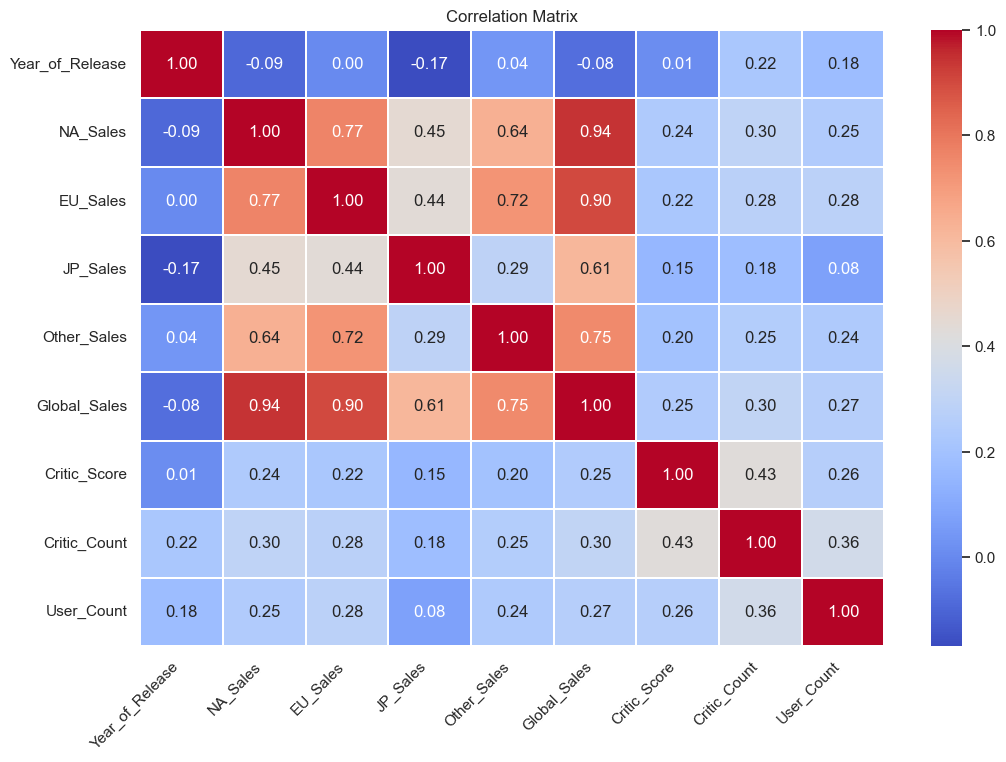

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=.10)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

To have a better understanding of the distribution of null values, the isnull visualisation is used to understand the distribution of missing values and make a decision on whether to drop columns or rows that containn a high number of missing values or use another technique to deal with missing values.

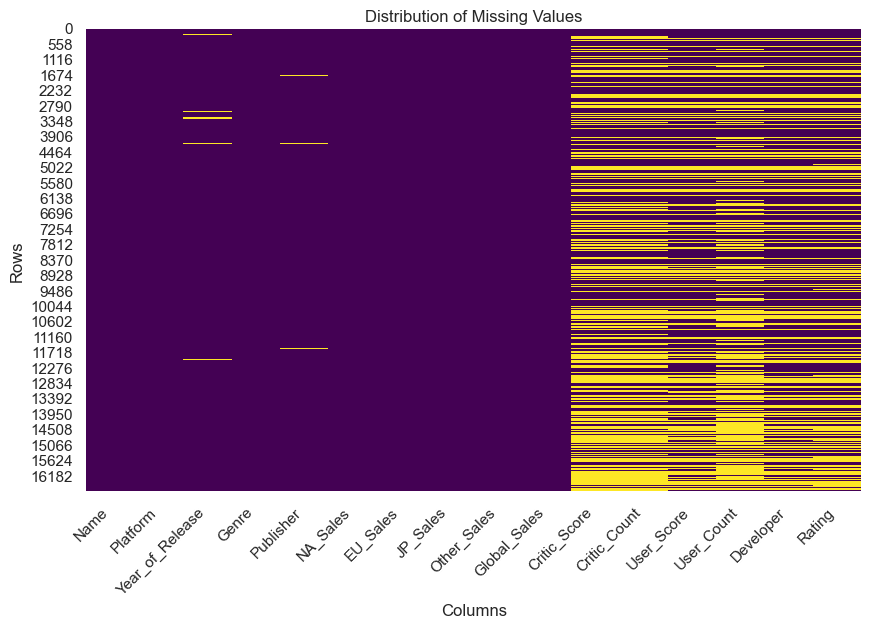

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(vgsales_df.isnull(), cmap='viridis', cbar=False)
plt.title('Distribution of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(rotation=45, ha='right')
plt.show()

The following columns have been dropped as they contain a large number of missing values and they are irrelevant to the required analysis and the correlation matrix shows lower relationship with the target variable. Also dropping the irrelevant columns helps reduce the complexity as the fill in missing values can produce bias. User Count is kept to be used in part two of the analysis.

In [12]:
vgsales_df.drop(['Critic_Score','Critic_Count','User_Score','Rating'],axis=1,inplace=True)

In [13]:
vgsales_df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  User_Count  \
0     41.36     28.96      3.77         8.45         82.53       322.0   
1     29.08      3.58      6.81         0.77         40.24         NaN   
2     15.68     12.76      3.79         3.29         35.52       709.0   
3     15.61     10.93      3.28         2.95         32.77       192.0   
4     11.27      8.89     10.22         1.00         31.37         NaN   

  Developer  
0  Nintendo  
1       NaN  
2  Nintendo  
3  Nintendo  
4       NaN

Pairplot is used to explore relationships and distributions in the dataset as well as identify patterns, trends, and potential outliers.

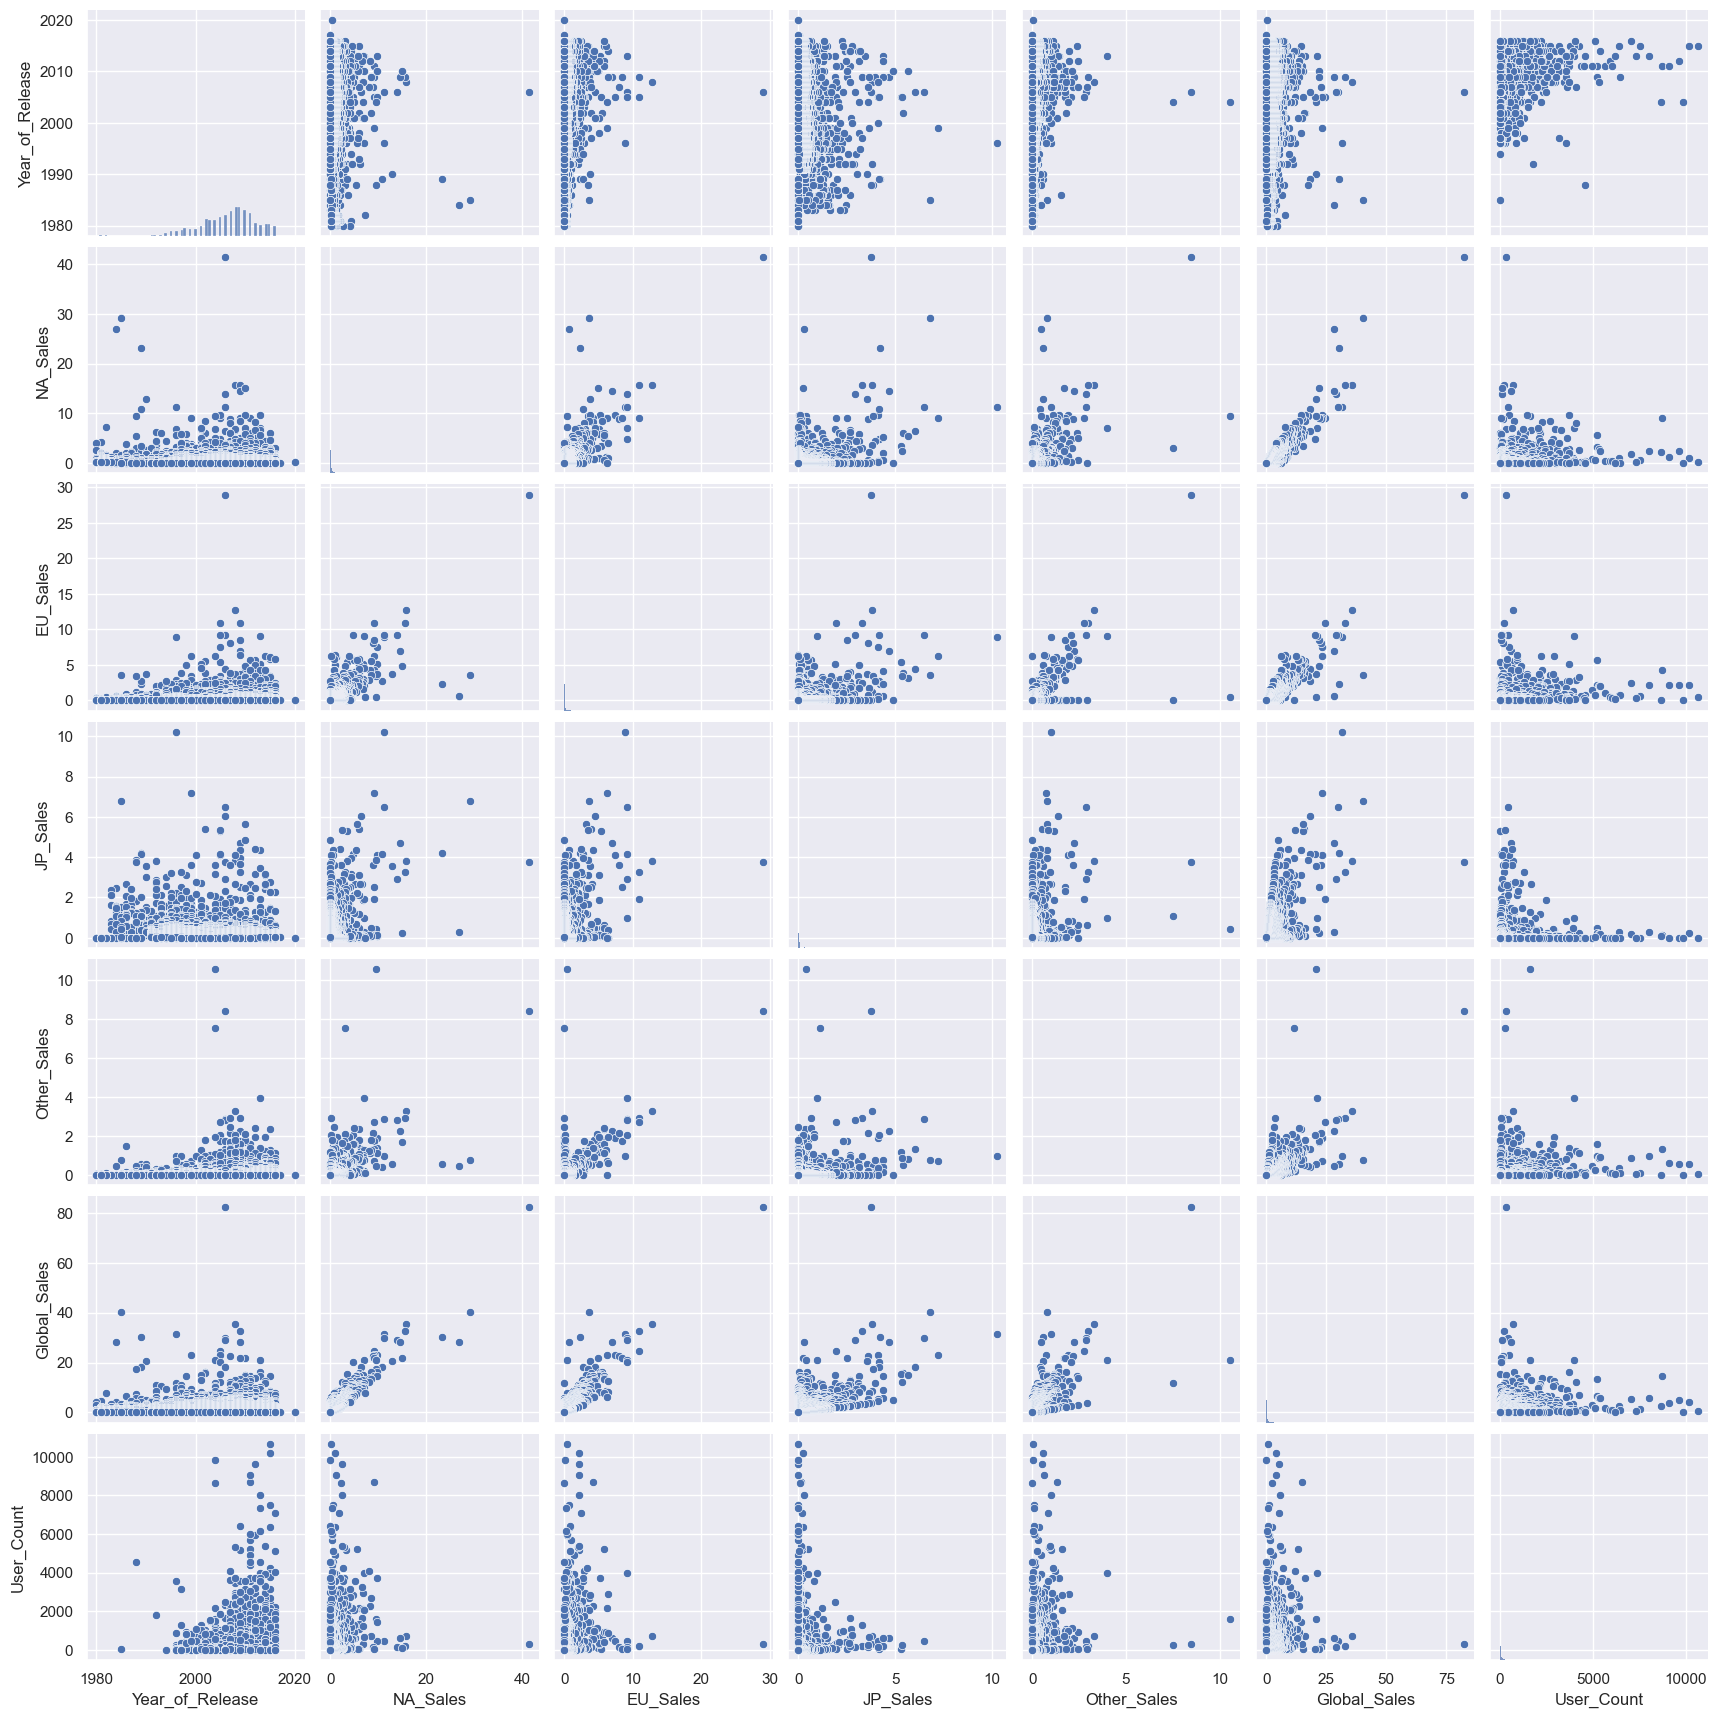

In [14]:
sns.pairplot(vgsales_df)

The decison to drop null values in both Name and Genre is because there are only two missing values and they are unique identifiers, dropping them for simplicity and better accuracy and they will not affect the outcome of the analysis.

In [15]:
vgsales_df.dropna(subset=['Name','Genre'],axis=0,inplace=True)

The median is used to fill in missing values because of its simplicity and to preserve the overall structure and characteristics of the data.

In [16]:
vgsales_df['Year_of_Release'].fillna(vgsales_df['Year_of_Release'].median(),inplace=True)

The mode is used to fill in missing values Publisher and devloper because the features are categorical and the use of the mode replces the missing values with most available publisher.

In [17]:
vgsales_df['Publisher'].fillna(vgsales_df['Publisher'].mode()[0],inplace=True)

In [18]:
#vgsales_df['Developer'].fillna(vgsales_df['Developer'].mode()[0],inplace=True)
vgsales_df['Developer'] = vgsales_df['Developer'].fillna(method='ffill')

In [19]:
vgsales_df['User_Count'].fillna(vgsales_df['User_Count'].mean(),inplace=True)

In [20]:
vgsales_df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
User_Count         0
Developer          0
dtype: int64

In [21]:
vgsales_df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

   User_Count Developer  
0  322.000000  Nintendo  
1  162.229908  Nintendo  
2  709.000000  Nintendo  
3  192.000000  Nintendo  
4  162.229908  Nintendo  
5  162.229908  Nintendo  
6  431.000000  Nintendo  
7  129.000000  Nintendo  
8  594.000000  Nintendo  
9  162.229908  Nintendo

# Finding the top 5 games by global sales

The barplot visualisation is used to analyse and view the top 5 games the generated sales.

In [22]:
top_5_global_sales = vgsales_df.sort_values(by='Global_Sales', ascending=False).head(5)

In [23]:
top_5_global_sales[['Name', 'Global_Sales']]

Name  Global_Sales
0                Wii Sports         82.53
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.52
3         Wii Sports Resort         32.77
4  Pokemon Red/Pokemon Blue         31.37

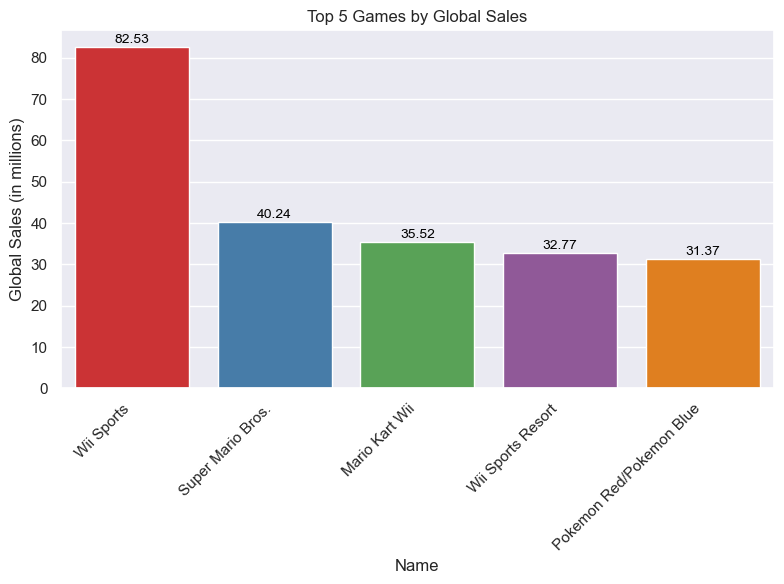

In [24]:
plt.figure(figsize=(8, 6))
colors = sns.color_palette('Set1', len(top_5_global_sales))
ax = sns.barplot(x='Name', y='Global_Sales', data=top_5_global_sales, palette=colors)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_title('Top 5 Games by Global Sales')
ax.set_xlabel('Name')
ax.set_ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exploring the correlation between the “na_sales” and “jp_sales” for the years 2010-2014

Correlation between “na_sales” and “jp_sales” to understand whether the two markets show similar trends and interest in the same games or they have two different targets and have different interest.

In [25]:
sales_2010_2014 = vgsales_df[(vgsales_df['Year_of_Release'] >= 2010) & (vgsales_df['Year_of_Release'] <= 2014)]

In [26]:
correlation = sales_2010_2014['NA_Sales'].corr(sales_2010_2014['JP_Sales'])

In [27]:
correlation_matrix = sales_2010_2014[['NA_Sales', 'JP_Sales']].corr()
correlation_coefficient = correlation_matrix.loc['NA_Sales', 'JP_Sales']

('Correlation coefficient between NA Sales and JP Sales:', correlation_coefficient)

('Correlation coefficient between NA Sales and JP Sales:', 0.26043134778810195)

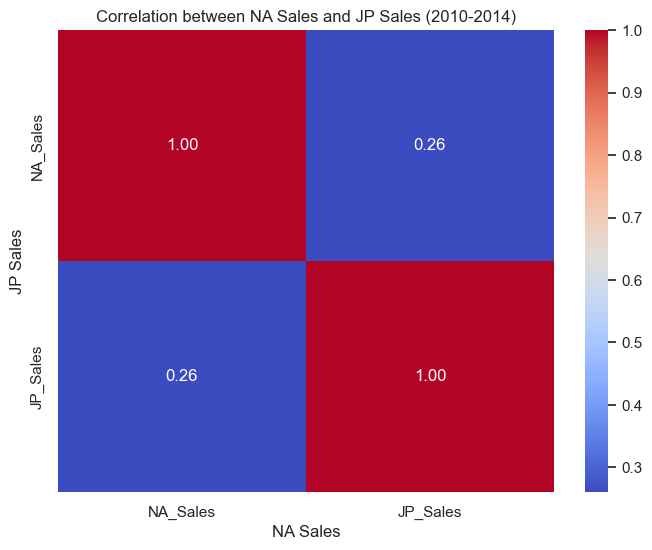

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(sales_2010_2014[['NA_Sales', 'JP_Sales']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between NA Sales and JP Sales (2010-2014)')
plt.xlabel('NA Sales')
plt.ylabel('JP Sales')
plt.show()

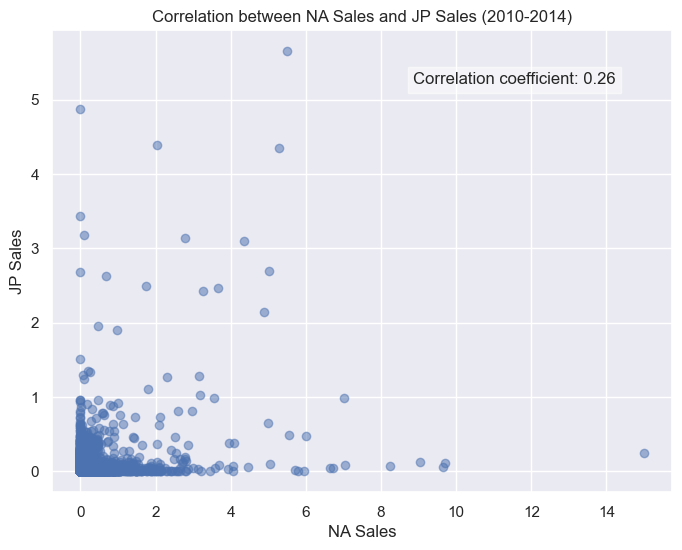

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(sales_2010_2014['NA_Sales'], sales_2010_2014['JP_Sales'], alpha=0.5)
plt.title('Correlation between NA Sales and JP Sales (2010-2014)')
plt.xlabel('NA Sales')
plt.ylabel('JP Sales')
correlation = sales_2010_2014[['NA_Sales', 'JP_Sales']].corr().iloc[0, 1]
plt.text(0.95 * sales_2010_2014['NA_Sales'].max(), 0.95 * sales_2010_2014['JP_Sales'].max(), f'Correlation coefficient: {correlation:.2f}', fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True)
plt.show()

# The distribution of the most popular 4 game genres

In [30]:
genre_sales = vgsales_df.groupby('Genre')['Global_Sales'].sum()

In [31]:
top_4_genres = genre_sales.sort_values(ascending=False).head(4).index

In [32]:
top_4_genre = vgsales_df[vgsales_df['Genre'].isin(top_4_genres)]

In [33]:
genre_counts = top_4_genre['Genre'].value_counts()

print("Counts of each genre in the top 4 genres based on Global Sales:")
print(genre_counts)

Counts of each genre in the top 4 genres based on Global Sales:
Action          3370
Sports          2348
Role-Playing    1500
Shooter         1323
Name: Genre, dtype: int64


<Figure size 800x600 with 0 Axes>

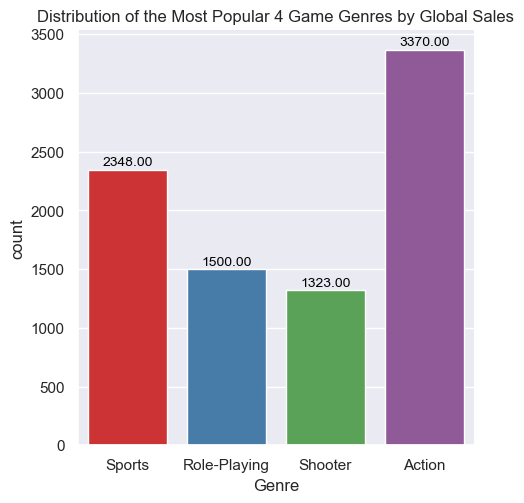

In [34]:
plt.figure(figsize=(8, 6))
ax = sns.catplot(data=top_4_genre,kind='count', x='Genre', palette=colors)

for ax in ax.axes.flat:
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.title('Distribution of the Most Popular 4 Game Genres by Global Sales')
plt.show()

In [35]:
genre_counts = vgsales_df['Genre'].value_counts()

In [36]:
most_popular_genres = genre_counts.head(4)

In [37]:
total_games = len(vgsales_df)
distribution = (most_popular_genres / total_games) * 100

print("Distribution of the most popular four game genres:")
print(distribution)

Distribution of the most popular four game genres:
Action          20.159119
Sports          14.045582
Misc            10.468385
Role-Playing     8.972902
Name: Genre, dtype: float64


In [38]:
most_popular_genres = vgsales_df.groupby('Genre')['User_Count'].sum().nlargest(4).index

In [39]:
genre_user_count = top_4_genre.groupby('Genre')['User_Count'].sum().sort_values(ascending=False)

In [40]:
genre_user_count = top_4_genre.groupby('Genre')['User_Count'].sum().sort_values(ascending=False)

print("Distribution of the Most Popular 4 Game Genres by User Count:")
print(genre_user_count)

Distribution of the Most Popular 4 Game Genres by User Count:
Genre
Action          595502.057971
Shooter         410839.733202
Role-Playing    361123.040184
Sports          247825.235178
Name: User_Count, dtype: float64


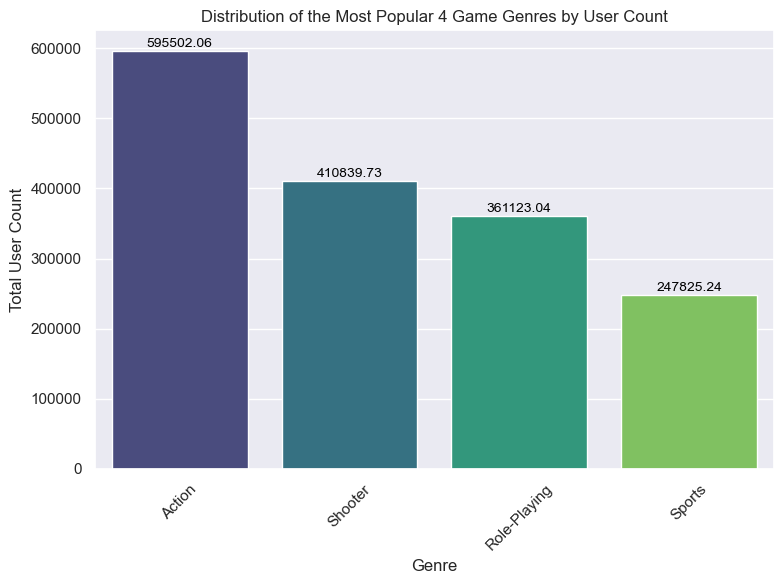

In [41]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=genre_user_count.index, y=genre_user_count.values, palette='viridis')
ax.set_title('Distribution of the Most Popular 4 Game Genres by User Count')
ax.set_xlabel('Genre')
ax.set_ylabel('Total User Count')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

In [42]:
older_games = vgsales_df[vgsales_df['Year_of_Release'] <= 2005]
newer_games = vgsales_df[vgsales_df['Year_of_Release'] > 2005]

In [43]:
mean_eu_sales_old = older_games['EU_Sales'].mean()
mean_eu_sales_new = newer_games['EU_Sales'].mean()

In [44]:
print("Mean EU_Sales for older games (2005 and earlier):", mean_eu_sales_old)
print("Mean EU_Sales for newer games (after 2005):", mean_eu_sales_new)

Mean EU_Sales for older games (2005 and earlier): 0.14787759777450502
Mean EU_Sales for newer games (after 2005): 0.14335847633415047


In [45]:
if mean_eu_sales_old > mean_eu_sales_new:
    print("Older games have a higher mean EU_Sales than newer games.")
elif mean_eu_sales_old < mean_eu_sales_new:
    print("Newer games have a higher mean EU_Sales than older games.")
else:
    print("The mean EU_Sales for older and newer games are the same.")

Older games have a higher mean EU_Sales than newer games.


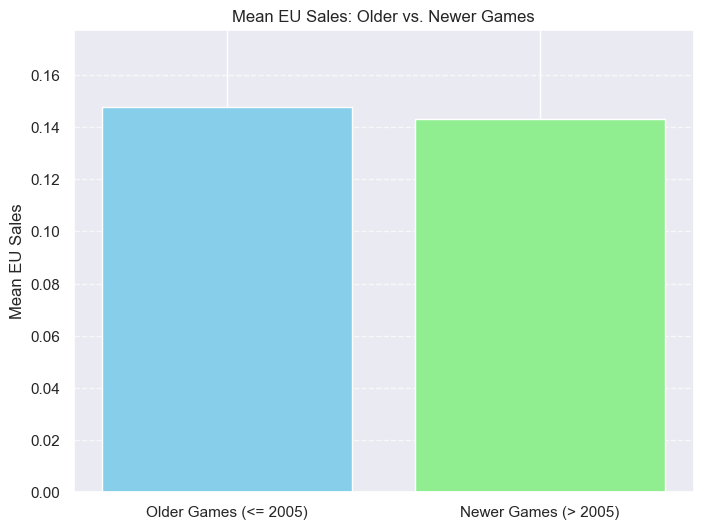

In [46]:
plt.figure(figsize=(8, 6))
plt.bar(['Older Games (<= 2005)', 'Newer Games (> 2005)'], [mean_eu_sales_old, mean_eu_sales_new], color=['skyblue', 'lightgreen'])
plt.title('Mean EU Sales: Older vs. Newer Games')
plt.ylabel('Mean EU Sales')
plt.ylim(0, max(mean_eu_sales_old, mean_eu_sales_new) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# The 3 most common developer

In [47]:
top_developers = vgsales_df['Developer'].value_counts().head(3)
print(top_developers)

Ubisoft      320
EA Sports    266
Konami       259
Name: Developer, dtype: int64


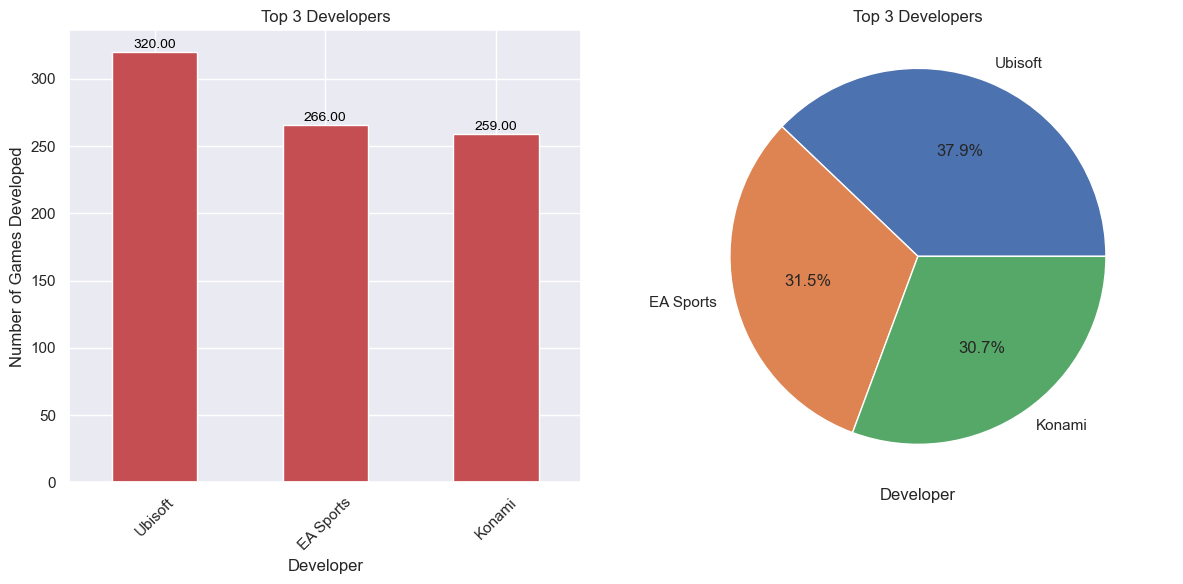

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

top_developers.plot(kind='bar', color='r', ax=axes[0])
axes[0].set_title('Top 3 Developers')
axes[0].set_xlabel('Developer')
axes[0].set_ylabel('Number of Games Developed')
for p in axes[0].patches:
    axes[0].annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')
axes[0].tick_params(axis='x', rotation=45)

top_developers.plot(kind='pie', labels=top_developers.index, autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Top 3 Developers')
axes[1].set_ylabel('')  
axes[1].set_xlabel('Developer') 
axes[1].axis('equal')


plt.tight_layout()
plt.show()

# Does the User Count have an impact on the Global Sales? What are the top 5 games based on User Count? and what is the Global Sales for the top 5 games that are based on the highest user count

In [49]:
top_5_user_counts = vgsales_df.groupby('Name')['User_Count'].sum().nlargest(5)
top_5_user_counts

Name
The Witcher 3: Wild Hunt          24807.000000
Call of Duty: Modern Warfare 3    20053.000000
The Elder Scrolls V: Skyrim       15513.459816
Grand Theft Auto V                15124.000000
Fallout 4                         13489.000000
Name: User_Count, dtype: float64

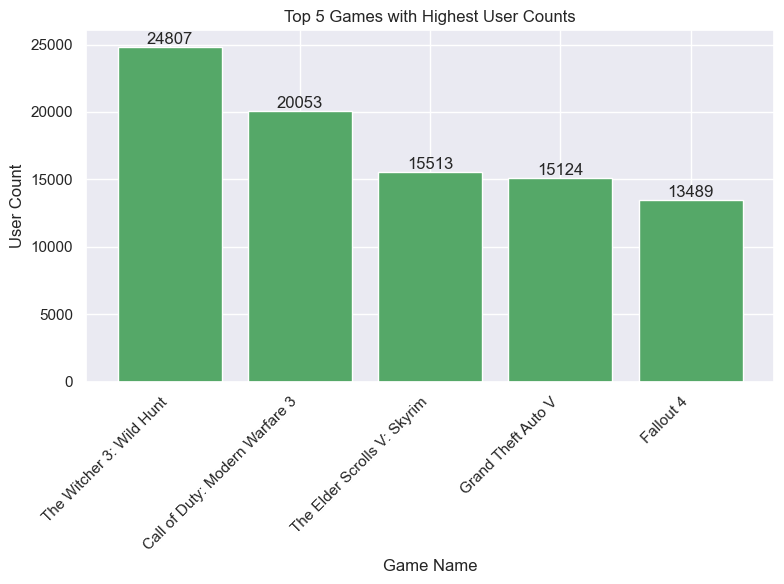

In [50]:
plt.figure(figsize=(8, 6))
top_5 = plt.bar(top_5_user_counts.index, top_5_user_counts.values, color='g')
plt.title('Top 5 Games with Highest User Counts')
plt.xlabel('Game Name')
plt.ylabel('User Count')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(top_5_user_counts.values):
    plt.text(i, value, str(int(value)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [52]:
merged_data = pd.merge(top_5_user_counts, vgsales_df[['Name', 'Global_Sales']], on='Name')

In [53]:
grouped_data = merged_data.groupby('Name').agg({'User_Count': 'sum', 'Global_Sales': 'sum'}).reset_index()

In [64]:
top_5_user_counts = grouped_data.sort_values(by='User_Count', ascending=False)
top_user_count = top_5_user_counts.head(5)
top_user_count

Name    User_Count  Global_Sales
0  Call of Duty: Modern Warfare 3  80212.000000         30.59
3     The Elder Scrolls V: Skyrim  77567.299078         21.15
2              Grand Theft Auto V  75620.000000         56.57
4        The Witcher 3: Wild Hunt  74421.000000          6.00
1                       Fallout 4  40467.000000         12.67

In [68]:
top_5_global_sales = grouped_data.sort_values(by='Global_Sales', ascending=False).drop_duplicates().head(5)
print("\nTop 5 games based on global sales:")
top_5_global_sales


Top 5 games based on global sales:


Name    User_Count  Global_Sales
2              Grand Theft Auto V  75620.000000         56.57
0  Call of Duty: Modern Warfare 3  80212.000000         30.59
3     The Elder Scrolls V: Skyrim  77567.299078         21.15
1                       Fallout 4  40467.000000         12.67
4        The Witcher 3: Wild Hunt  74421.000000          6.00

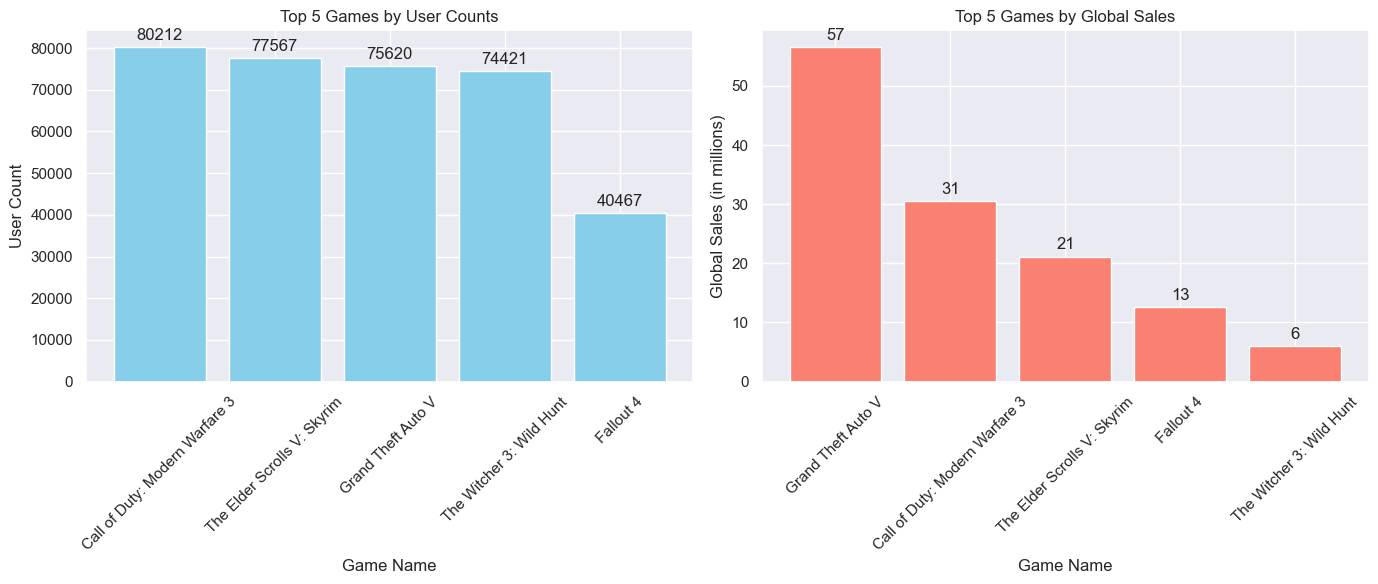

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

u_count = axes[0].bar(top_4_user_counts['Name'], top_5_user_counts['User_Count'], color='skyblue')
axes[0].set_title('Top 5 Games by User Counts')
axes[0].set_xlabel('Game Name')
axes[0].set_ylabel('User Count')
axes[0].tick_params(axis='x', rotation=45)

g_sales = axes[1].bar(top_4_global_sales['Name'], top_5_global_sales['Global_Sales'], color='salmon')
axes[1].set_title('Top 5 Games by Global Sales')
axes[1].set_xlabel('Game Name')
axes[1].set_ylabel('Global Sales (in millions)')
axes[1].tick_params(axis='x', rotation=45)

def annotate_bars(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.0f}'.format(height),  # Format to display no decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(u_count, axes[0])
annotate_bars(g_sales, axes[1])
plt.tight_layout()
plt.show()

In [58]:
import plotly.express as px
publish_sales = vgsales_df.groupby('Publisher')['Global_Sales'].sum().reset_index()
publisher = publish_sales.nlargest(10,'Global_Sales')
top_publisher = vgsales_df[vgsales_df['Publisher'].isin(publisher['Publisher'])]

fig = px.histogram(top_publisher, x='Publisher', y='Global_Sales',
                   title='Publishers by Global Sales',
                   labels={'Publisher':'Publisher','Global_Sales': 'Global Sales'},
                   histfunc='sum',
                   color='Publisher')
fig.update_xaxes(title_text='Publisher')
fig.update_yaxes(title_text='Global Sales')

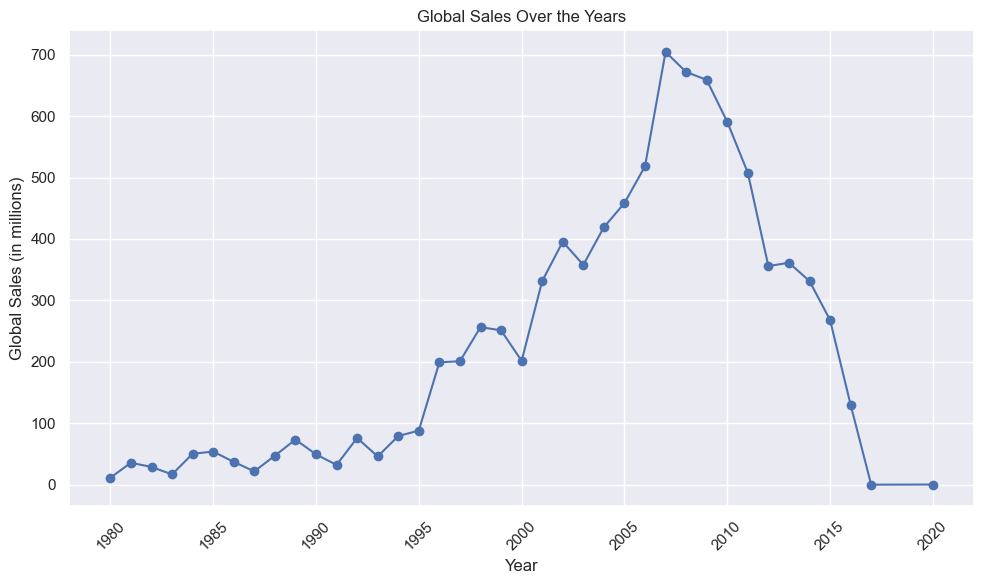

In [60]:
sales_over_years = vgsales_df.groupby('Year_of_Release')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_over_years.index, sales_over_years.values, marker='o', linestyle='-')

plt.title('Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
correlation = vgsales_df['User_Count'].corr(vgsales_df['Global_Sales'])
print("Correlation coefficient between User_Count and Global_Sales:", correlation)

Correlation coefficient between User_Count and Global_Sales: 0.21636457186004543


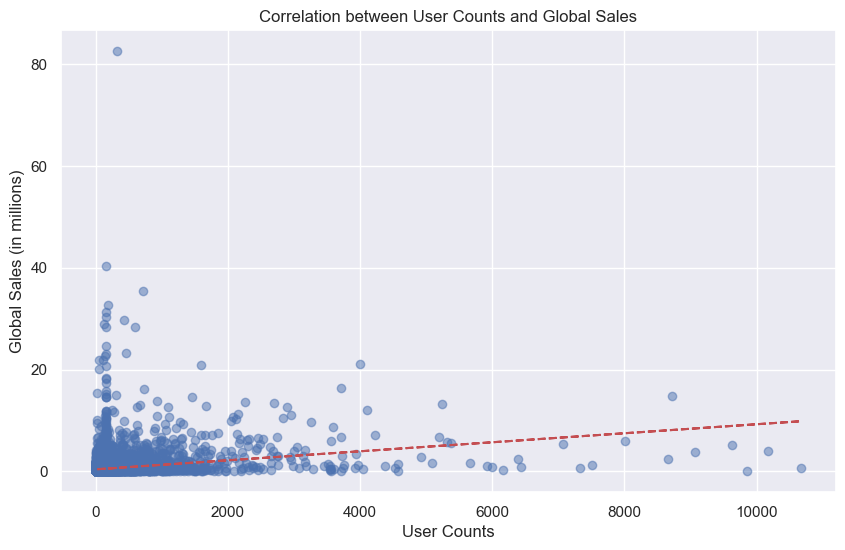

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(vgsales_df['User_Count'], vgsales_df['Global_Sales'], alpha=0.5)
plt.title('Correlation between User Counts and Global Sales')
plt.xlabel('User Counts')
plt.ylabel('Global Sales (in millions)')
z = np.polyfit(vgsales_df['User_Count'], vgsales_df['Global_Sales'], 1)
p = np.poly1d(z)
plt.plot(vgsales_df['User_Count'],p(vgsales_df['User_Count']),"r--")

plt.show()

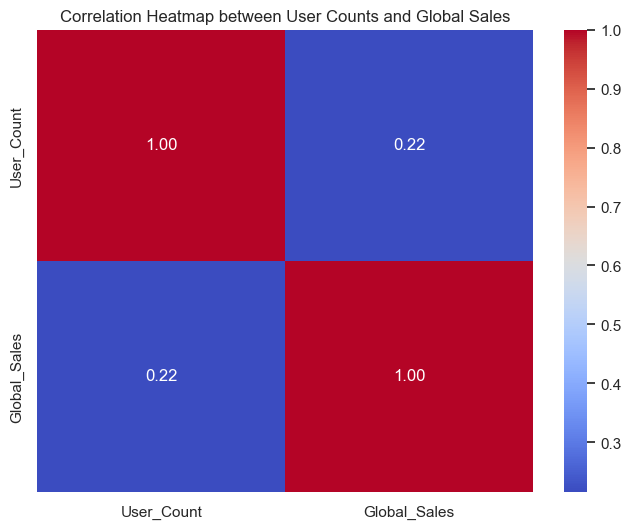

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(vgsales_df[['User_Count', 'Global_Sales']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between User Counts and Global Sales')
plt.show()

# Part 3

Missing Values:
The decision to drop 4 columns (Critic Score, Critic Count, User Score and Rating) is based on several considerations:
1- They contain a large number of missing values which could potentially affect the accuracy and reliability of the analysis using these variables.
 The following visualisation shows the distribution of missing values across the dataset.
 

2- The correlation matrix shows a low correlation between these columns and the Global Sales which means they are irrelevant to the required analysis. Even though User Counts contains a high number of missing values, it will be kept to determine the effect of a low correlation on the result and to answer more questions.
 

3- They are dropped to simplify and reduce complexity of the dataset, as well as avoiding the potential bias being introduced into the analysis that may affect the result of the analysis.




Missing Values

Dropping variables:

The decision to drop 4 columns (Critic Score, Critic Count, User Score and Rating) is based on several considerations:

1- They contain a large number of missing values which could potentially affect the accuracy and reliability of the analysis using these variables.
 The following visualisation shows the distribution of missing values across the dataset.
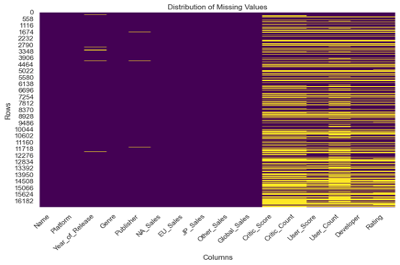

2- The correlation matrix shows a low correlation between these columns and the Global Sales which means they are irrelevant to the required analysis. Even though User Counts contains a high number of missing values, it will be kept to determine the effect of a low correlation on the result and to answer more questions.
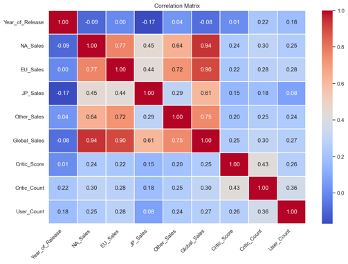

3- They are dropped to simplify and reduce complexity of the dataset, as well as avoiding the potential bias being introduced into the analysis that may affect the result of the analysis.

 Observations with missing values:

The decision to drop null values in both the (Name and Genre) columns is based on the fact that there are only two missing values present, and they serve as unique identifiers. By dropping these rows, we simplify the dataset while ensuring better accuracy. Moreover, since these missing values are unique and minimal in number, their removal will not significantly impact the outcome of the analysis.

Year of Release:
The median is used to fill in missing values for the Year of Release because of its simplicity and ability to preserve the overall structure and characteristics of the dataset.

Publisher and Developer:
The mode is used to fill in missing values for both (Publisher and Developer) because the features are categorical and the use of the mode replaces the missing values with the most frequently occurring publisher or developer, to maintain the integrity of the categorical data.

User Count:
The User Count has a numerical values and a high number of missing values, and the use of the mean because it is less sensitive to outliers and being able to maintain the overall distribution and shape of the data to ensure the analysis are accurate.

Developer:
After using the mode to fill in missing values, the result showed a huge bias to one specific developer, then the decision was to change the method to use the forward method for more accuracy. 

Top 5 games with the most global sales generated

To explore and gain insight into the dataset and identify the best performing games that have generated  the best global sales and find the top 5 games by global sales, the dataset is sorted in a descending order to ensure that the sales with highest numbers are listed on top of the list. The bar plot is used to view and compare the games with the top 5 global sales.  
The colours were chosen because they provide a distinct set of colours that are visually appealing and easy to differentiate as well as ensuring that each bar in the plot has a unique and identifiable colour, making it easier for viewers to interpret the data.
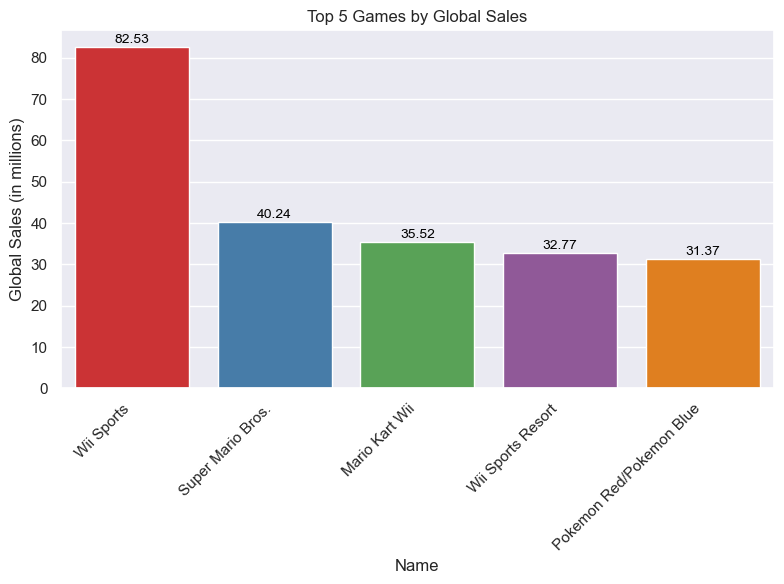

Exploring the correlation between the “na_sales” and “jp_sales” for the years 2010-2014

To explore the relationship between the two markets to understand whether the two markets show similar trends and interest in the same games or they have two different targets and give different sales outcome. The correlation coefficient shows the strength and direction of the linear relationship between the two markets.
The correlation coefficient of 0.26 suggests a positive but weak correlation between NA Sales and JP Sales for the years 2010-2014. It is considered weak because it is closer to the zero than the one as one means high correlation between the two markets. This suggests that the strategy for each market should be tailored specifically for the market and not to follow one strategy for worldwide markets.

The heatmap visualisation is used to display the correlation matrix between NA Sales and JP Sales for the years 2010-2014. It gives clear representation of the correlation between the two markets to identify patterns and relationships in the dataset. The colours are used to enhance and clearly show the negative and positive correlation where warmer colours (red) represent positive correlations, while cooler colours (blue) represent negative correlations.


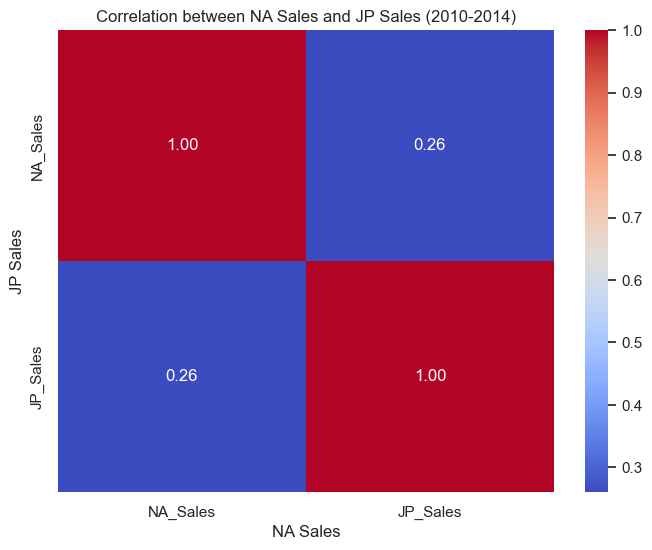

The scatter plot shows the correlation between NA Sales and JP Sales for the years 2010-2014. The graphical illustration of the relationship between these two variables show how data are dispersed,
where the relationship between the two markets are strong close to the zero and then it gets weaker when data points move away toward one. Two colours are used to differentiate the two markets data points as well as keeping one market values semi-transparent to allow overlapping points to be visible.
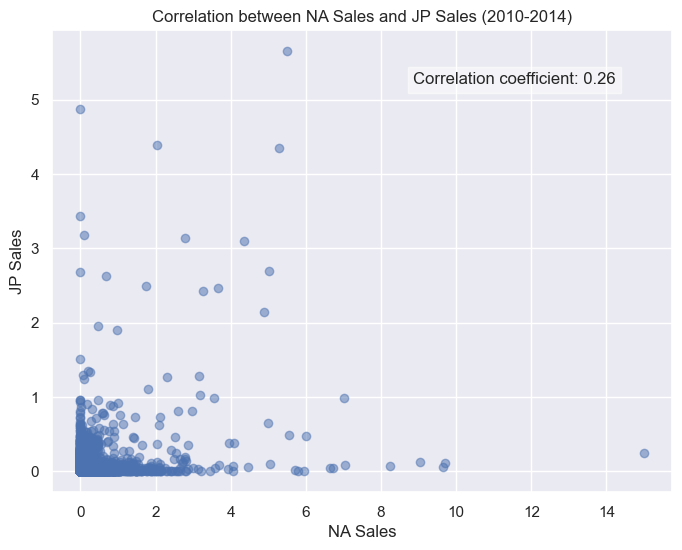

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))

# Scatter plot
sns.scatterplot(data=sales_2010_2014, x="NA_Sales", y="JP_Sales", alpha=0.5, hue="Genre", ax=axs[0])

# Histogram
sns.histplot(data=sales_2010_2014, x="Genre", hue="Genre", shrink=.8, alpha=.8, legend=False, ax=axs[1])

# Adjust layout
f.tight_layout()

# Show plot
plt.show()


The distribution of the most popular 4 game genres

To find The distribution of the most popular 4 game genres, a new sub dataset is used based on the Genre and Global Sales variables. The new dataset if grouped by the Genre and added the total sales for each genre to be able to sort the values with the highest values on top.

Then cat plot visualisation is used to present the result in a clear and concise manner with the use of different colours in order to differentiate the top 4 genres while annotating the numbers inside the bars positioned in the middle with a small size to avoid distraction from the main visualisation to show the exact sales numbers of each genre.
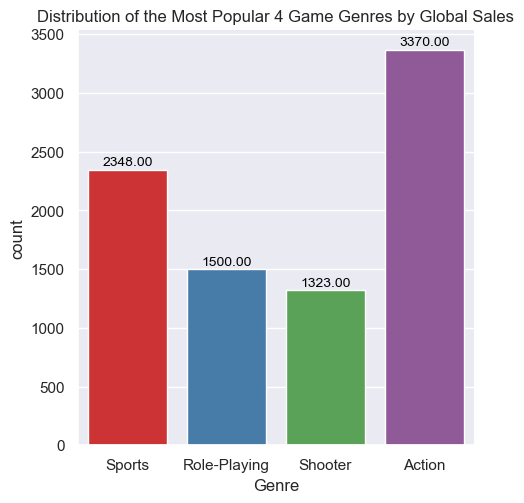

To have a different perspective, the popularity of game genre, is used to see the distribution based on the User Count to understand which genre have the highest number of users.
This is done by grouping User Count based on Genre and the summing them, to be able to sort Genre with highest number of users.

The bar plot is used because it is based on categorical variable (Genre) with its corresponding numerical variable (User Count) to show the top 4 genres based on User Count.
Multiple colours are used to show the result, so that each bar has its own distinctive colour that refers and shows different genre. Also annotation is used in the middle of the bar to show the exact number of users for each genre.
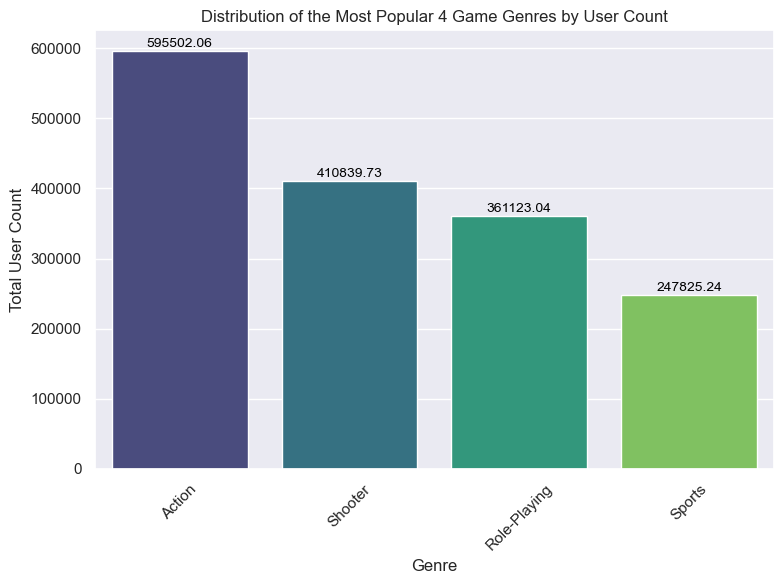

Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?

In order to an understanding of whether the newer games have a higher mean or the older games. The dataset are split into two different subset with one that is based on 2005 and earlier and another subset that is based on games from 2006 onward, then the calculation is done using the mean.

To illustrate the result bar plot is used to compare the result that shows, older games have higher mean than the newer games, which means that on average older have higher sale in the European market than the newer games. The title of the visualisation explains on what it is based, and the colours used to differentiate the two categories.
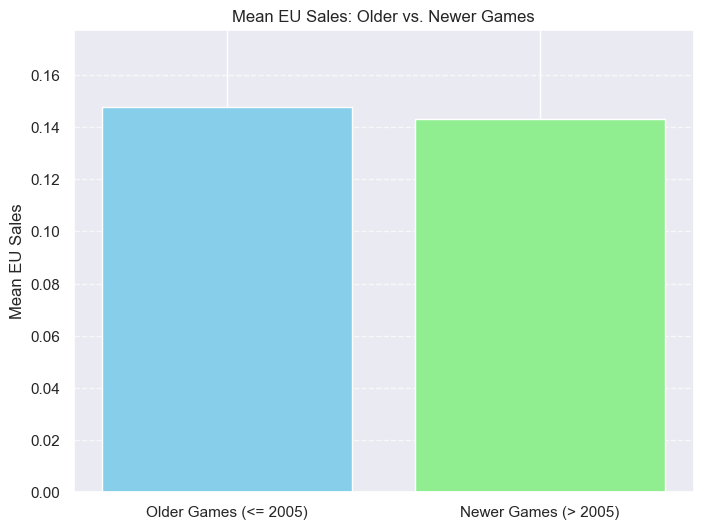

The 3 most common developer

To have an insight into the developers of games, the value count is used to sum developers and show the most 3 common developers.

Bar chart is used to provide a clear representation of the number of games developed by each of the top 3 developers for easier comparison of the number of games developed by each developer, with the length of the bars directly corresponding to the number of games. By using the red colour, the chart effectively highlights the top developers and makes them stand out.

The pie chart visualises the distribution of the top 3 developers as a proportion of the total. It shows the relative contribution percentage of each developer to the total number of games developed. Different colours are used to distinguish between the different segments representing each developer, to help visually separate the segments and makes it easier for viewers to identify each developer's contribution.


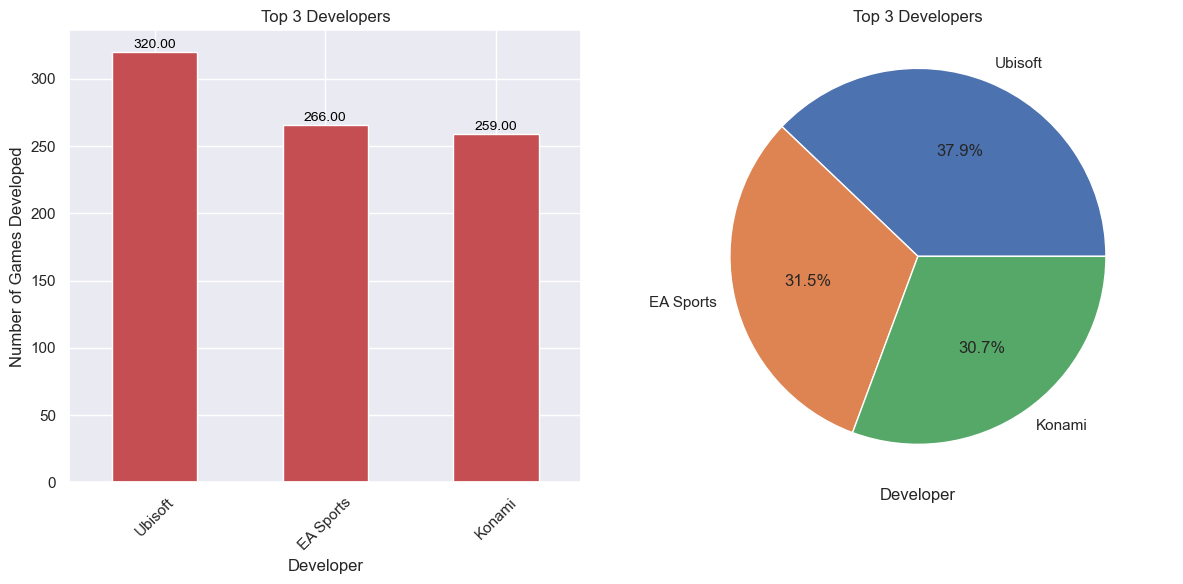

# Does the User Count have an impact on the Global Sales? What are the top 5 games based on User Count? and what is the Global Sales for the top 5 games that are based on the highest user count?

These additional questions are used to gain deeper insight into the analysis of the dataset. 
The User Count is used by creating a subset of the dataset that includes the User Count and the Name variables. Then grouping and summing all the user count by name to get the top 5 games with the most user count.
The bar chart is used to show the top 5 games and compare them to each other with the number of users appearing on top of the bars to show the exact number of users. The game names are rotated to prevent them from appearing on top of each other. The colour green is used to draw attention to the top 5 games convey the popularity for these games.
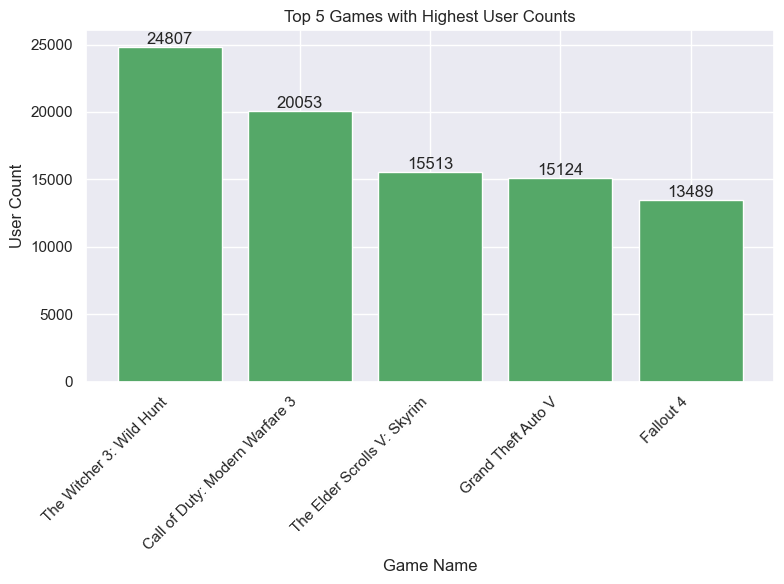

Comparison of Global Sales VS User Count:

To gain more insight into the analysis to compare the two variables to see the popularity of top games and how they are ranked based on Global Sales. This is done by creating a sub data that merges the top 5 user count subset with another data that contains the Name and Global Sales variables to create the new sub data to be able to compare the two result. Then calculating the total user count and total global sales for each game and finally sorting the games to show the top results.

The a side by side is shown using bar chart for easy comparison to quickly identify any discrepancies or similarities between the two rankings and gain clarity on the ranking of the top 5 games for both results. The use of multicolours could overwhelm viewers, thu skyblue and salmon colours are used because skyblue gives calmness and salmon grabs attention making it easy to distinguish between the two charts. The games name are long, thus they are rotated to 45 degrees on the X axis to be able to read them easily and to avoid them being crossing each other.
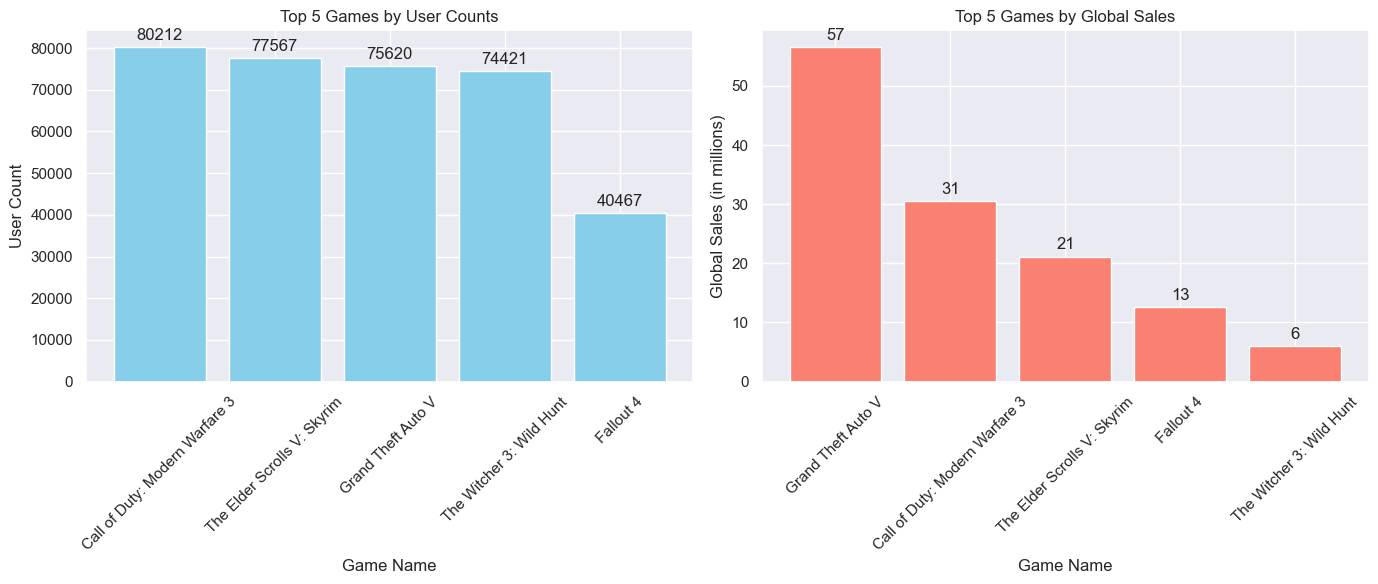

Publishers by Global Sales

To gain deeper insight of how much global sales each publisher is generating and what are the best performing publishers, the plotly express is used to achieve the required analysis. This is done by grouping the data by the publisher and calculating the sum of global sales for each publisher. The using the sort technique to select the top ten publishers. The plotly express is used to view the top ten publisher to generate an interactive visualisation that allows the user and viewer to explore the data dynamically by hovering over data points, zooming in/out, and toggling visibility of data series. Names are rotated on the X axis to avoid game names overlapping. Multiple colours are used to make it easier for the viewers to distinguish and have better clarity of the results. 
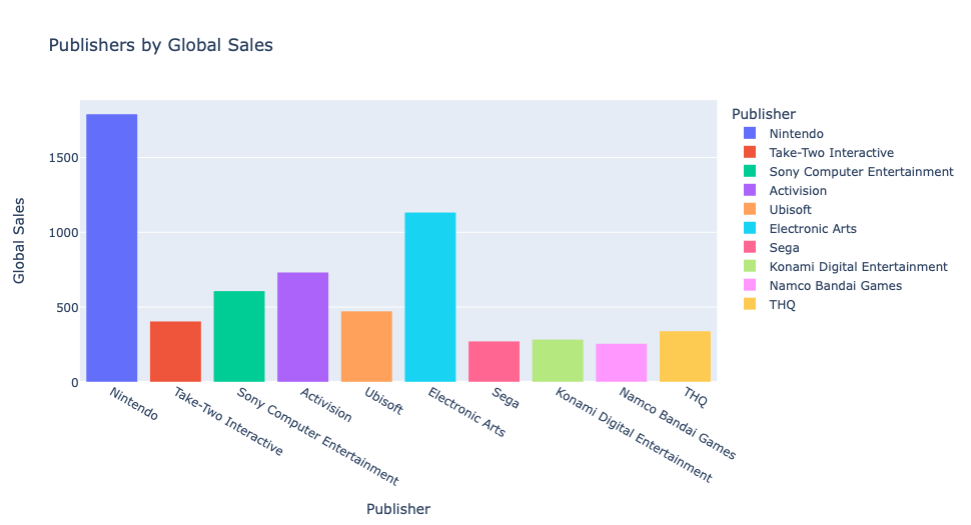

Sales Over The Years

This is used to have an insight about the highest and lowest Global Sales and the overall performance of the video game industry and how it has evolved over time. This helps to understand the growth or decline in global sales trends, identify patterns, and make informed decisions regarding future strategies, investments, or developments in the gaming industry.
This is done by grouping the global sales by the year, and sum the sales for each year. The years on the X axis are rotated by 45 degrees for better readability and better accuracy so that each data point is at the specified year.
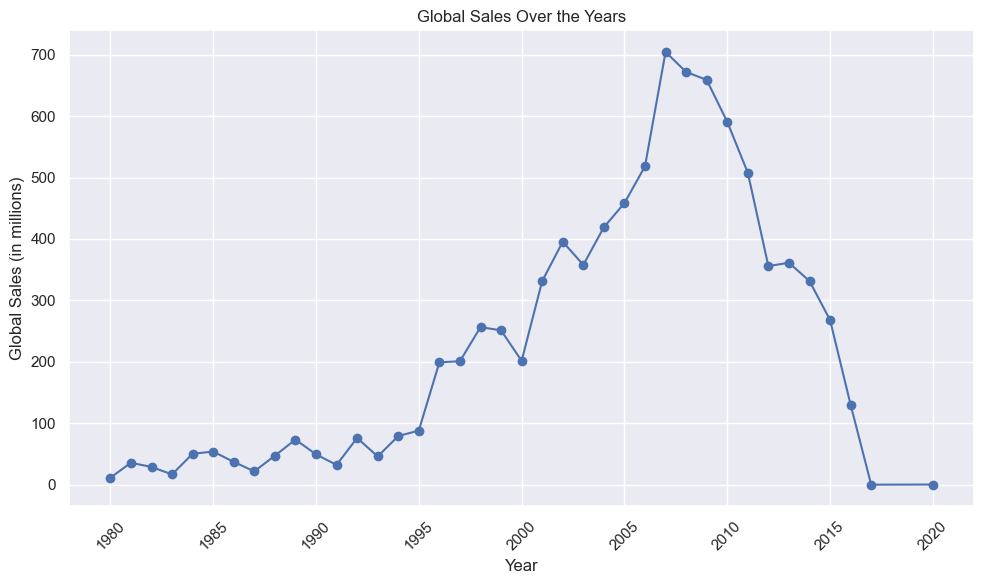